In [1]:
import json
import pandas as pd
import numpy as np
from pandas import json_normalize
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error, f1_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
with open('houses.json','r', encoding='utf-8') as json_file:
    data = json.load(json_file)
totalData = data.get('data')
df = json_normalize(totalData)
df.columns

Index(['identifier', 'title', 'totalPrice', 'unitPrice', 'images', 'age',
       'floorArea', 'floorAreaUnit', 'numOfBeds', 'numberOfParking',
       'description', 'seoDescription', 'bread_crumbs',
       'location.locationName', 'location.longitude', 'location.latitude',
       'location.targetGlobalLocation.id',
       'location.targetGlobalLocation.type', 'type.landuseType',
       'type.propertyType', 'features.parking', 'features.lobby',
       'features.warehouse', 'features.sports_hall', 'features.guard',
       'features.elevator', 'features.balcony', 'features.swimming_pool',
       'features.sauna', 'features.air_conditioning',
       'features.conference_hall', 'features.roof_garden',
       'features.remote_door', 'features.jacuzzi', 'features.central_antenna',
       'contact.type', 'contact.fullName', 'contact.callNumber',
       'contact.departmentName', 'contact.departmentLogoUrl',
       'contact.departmentId', 'contact.whatsappAvailibility', 'graph.content',
       '

In [3]:
df.drop('features.null', axis=1, inplace=True)

In [4]:
recordFeatures = {
    'پارکینگ': 'parking',
    'لابی': 'lobby',
    'انباری': 'warehouse',
    'سالن ورزش': 'sports_hall',
    'نگهبان': 'guard',
    'آسانسور': 'elevator',
    'بالکن': 'balcony',
    'استخر': 'swimming_pool',
    'سونا': 'sauna',
    'تهویه مطبوع': 'air_conditioning',
    'سالن اجتماعات': 'conference_hall',
    'روف گاردن': 'roof_garden',
    'درب ریموت': 'remote_door',
    'جکوزی': 'jacuzzi',
    'آنتن مرکزی': 'central_antenna',
}
features = ['totalPrice', 'floorArea', 'numOfBeds']
recordFeaturesColumns=[]
for item in recordFeatures.items():
  recordFeaturesColumns.append('features.' + item[1])
features.extend(recordFeaturesColumns.copy())
print(features)

['totalPrice', 'floorArea', 'numOfBeds', 'features.parking', 'features.lobby', 'features.warehouse', 'features.sports_hall', 'features.guard', 'features.elevator', 'features.balcony', 'features.swimming_pool', 'features.sauna', 'features.air_conditioning', 'features.conference_hall', 'features.roof_garden', 'features.remote_door', 'features.jacuzzi', 'features.central_antenna']


In [5]:
df = df[features]
df.dropna(inplace=True)
print(df.columns)
newPrice=[]
for item in df["totalPrice"]:
    newPrice.append(int(str(item)[:4]))
df['totalPrice'] = df['totalPrice'].replace(np.asanyarray(df["totalPrice"]), newPrice)

Index(['totalPrice', 'floorArea', 'numOfBeds', 'features.parking',
       'features.lobby', 'features.warehouse', 'features.sports_hall',
       'features.guard', 'features.elevator', 'features.balcony',
       'features.swimming_pool', 'features.sauna', 'features.air_conditioning',
       'features.conference_hall', 'features.roof_garden',
       'features.remote_door', 'features.jacuzzi', 'features.central_antenna'],
      dtype='object')


In [6]:
for item in recordFeaturesColumns:
  df[item]=df[item].astype('category').cat.codes

In [7]:
df.head(2)

,totalPrice,floorArea,numOfBeds,features.parking,features.lobby,features.warehouse,features.sports_hall,features.guard,features.elevator,features.balcony,features.swimming_pool,features.sauna,features.air_conditioning,features.conference_hall,features.roof_garden,features.remote_door,features.jacuzzi,features.central_antenna
0,3100.0,47.0,1.0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
1,1449.0,223.0,4.0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0


In [8]:
x = np.asanyarray(df[df.columns.difference(['totalPrice'])])
y = np.asanyarray(df['totalPrice'])
print(x)
print(y)

[[  1.   0.   0. ...   1.  47.   1.]
 [  1.   1.   0. ...   1. 223.   4.]
 [  1.   0.   0. ...   1. 134.   2.]
 ...
 [  0.   1.   0. ...   1.  55.   1.]
 [  0.   1.   0. ...   1.  60.   2.]
 [  1.   0.   1. ...   1.  63.   1.]]
[3100. 1449. 1540. ... 2850. 2900. 3500.]


In [9]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.1, random_state=0)

In [10]:
x_train = StandardScaler().fit_transform(x_train)
x_test = StandardScaler().fit_transform(x_test)

In [11]:
reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)

In [12]:
print(y_pred[:5])
print(y_test[:5])
linearReg_acc=r2_score(y_test, y_pred)
linearReg_mse=mean_squared_error(y_test, y_pred)
print('r2_score => ', linearReg_acc)
print('MSE => ', linearReg_mse)

[4076.98799635 3892.65263879 4153.92528989 4681.33341694 4541.20668217]
[3200. 8560. 5800. 6000. 1900.]
r2_score =>  0.06325215940283746
MSE =>  5871061.3473228505


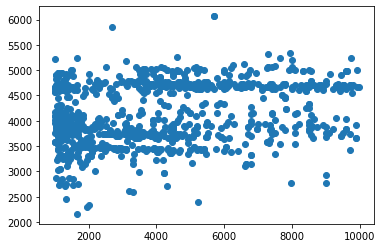

In [13]:
plt.scatter(y_test,y_pred)

In [14]:
from sklearn import metrics,svm

In [15]:
kernels=['linear', 'poly', 'rbf', 'sigmoid']
cell_svm=svm.SVC(kernel='sigmoid')
cell_svm.fit(x_train, y_train)
y_pred_svm=cell_svm.predict(x_test)
sigmoidSVM_acc=r2_score(y_test, y_pred_svm)
sigmoidSVM_mse=mean_squared_error(y_test, y_pred_svm)
print('r2_score => ', sigmoidSVM_acc)
print('MSE => ', sigmoidSVM_mse)

r2_score =>  -0.25947587364817015
MSE =>  7893757.315680166


In [17]:
cell_svm=svm.SVC(kernel='poly')
cell_svm.fit(x_train, y_train)
y_pred_svm=cell_svm.predict(x_test)
polySVM_acc=r2_score(y_test, y_pred_svm)
polySVM_mse=mean_squared_error(y_test, y_pred_svm)
print('r2_score => ', polySVM_acc)
print('MSE => ', polySVM_mse)

r2_score =>  -0.6366465246371373
MSE =>  10257672.05815161


In [21]:
print('linearReg_acc',linearReg_acc)
print('sigmoidSVM_acc',sigmoidSVM_acc)
print('linearReg_acc',polySVM_acc)
print('--------------')
print('linearReg_mse => ', linearReg_mse)
print('sigmoidSVM_mse => ', sigmoidSVM_mse)
print('sigmoidSVM_mse => ', sigmoidSVM_mse)
print('polySVM_mse => ', polySVM_mse)

linearReg_acc 0.06325215940283746
sigmoidSVM_acc -0.25947587364817015
linearReg_acc -0.6366465246371373
--------------
linearReg_mse =>  5871061.3473228505
sigmoidSVM_mse =>  7893757.315680166
sigmoidSVM_mse =>  7893757.315680166
polySVM_mse =>  10257672.05815161
